# PSEUDOCODE
based off the MATLAB pseudocode given in Appendix I written by previous head TA Raymond.

*you should update numpy when you can*
- when you do this trapz turns into trapeziod I think

## 0: Initialize Parameters

In [39]:
import matplotlib.pyplot as plt
import numpy as np

L = 1200 # Length of bridge
n = 1200 + 2*52 # Discretize into 1 mm seg.
P = 400 # Total weight of train [N]
x = [] # x-axis
xi = 0
for i in range(0, n+1):
    x.append(xi)
    xi += L/(n)

print(len(x))

1305


## 1: SFD, BMD Under Train Loading
SFDi and BMDi to be plotted, maxS and maxB for your own knowledge and use in future steps.

In [40]:
x_train = [52, 228, 392, 568, 732, 908] # train load locations
P_train = [P/6] * 6 # load at each location

n_train = 12 # number of train locations

# train start locations
t_loc = [-52]
for i in range (1, n_train):
    t_loc.append(t_loc[0] + (344/(n_train-1) * (i))) # CHECK THIS
print("train start locations", t_loc)

SFDi = [] # 1 SFD for each train loc
BMDi = [] # 1 BMD for each train loc
for i in range(n_train): # avoid aliasing
    SFDi.append([0]*len(x))
    BMDi.append([0]*len(x))
maxS = [0]*n_train # maximum shear force for each loc
maxB = [0]*n_train # maximum bending moment for each loc

# How to decide which locations to use?
for i in range(0, len(t_loc)):

    # REACTION FORCES
    
    # sum of moments at A
    Fb = 0
    sf_loc = [] # shear force locations
    for xp in range(len(x_train)):
        Fb += P_train[xp] * (t_loc[i] + x_train[xp])
        sf_loc.append(t_loc[i] + x_train[xp])
    Fb /= 1200 # dist between supports always 1200mm
    # sum of forces in y
    Fa = sum(P_train) - Fb

    print()
    print("Fa", Fa, "Fb", Fb)
    print("shear force locations", sf_loc)
    print("shear forces", P_train)

    # no uniform load so no applied loads thing for now

    # SHEAR FORCE DATA
    
    # Add to SFD

    #print("initial SFDi[i][0]", i, SFDi[i][0])
    for j in range(1, len(SFDi[i])):
        SFDi[i][j] += Fa
    #print(SFDi[i][0])
    for xs in range(len(sf_loc)):
        #print(sf_loc[xs], SFDi[i][int(sf_loc[xs])] - P_train[xs])
        for j in range(int(sf_loc[xs]), len(SFDi[i])):
            SFDi[i][j] -= P_train[xs]
    SFDi[i][-1] += Fb
    SFDi[i][-1] = 0
    #print(SFDi[i][-1])
    
    # BENDING MOMENT DATA
    # There seems to be some error
    
    # try with trapezoid integration from numpy
    for j in range(0, len(BMDi[i])):
        BMDi[i][j] = np.trapz(SFDi[i][:j+1])

    '''
    print("BM data")
    print(BMDi[i][0])
    for xs in range(len(sf_loc)):
        print(sf_loc[xs], BMDi[i][int(sf_loc[xs])])
    print(BMDi[i][-1])
    print("direct total", np.trapz(SFDi[i][:]))
    '''
    
for i in range(0, n_train):
    s1 = max(SFDi[i])
    s2 = -min(SFDi[i]) # bc shear force can be negative
    maxS[i] = max([s1, s2])
    maxB[i] = max(BMDi[i])

#print()
#print(maxS, maxB)
print()
print(max(maxS), max(maxB))

print(len(x)) # because I originally accidentally used x somewhere else

train start locations [-52, -20.727272727272727, 10.545454545454547, 41.81818181818181, 73.0909090909091, 104.36363636363637, 135.63636363636363, 166.9090909090909, 198.1818181818182, 229.45454545454544, 260.72727272727275, 292.0]

Fa 257.33333333333337 Fb 142.66666666666666
shear force locations [0, 176, 340, 516, 680, 856]
shear forces [66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667]

Fa 246.90909090909093 Fb 153.09090909090912
shear force locations [31.272727272727273, 207.27272727272728, 371.27272727272725, 547.2727272727273, 711.2727272727273, 887.2727272727273]
shear forces [66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667]

Fa 236.48484848484853 Fb 163.51515151515153
shear force locations [62.54545454545455, 238.54545454545456, 402.54545454545456, 578.5454545454545, 742.5454545454545, 918.5454545454545]
shear forces [66.66666666666667, 66.666666666666

I will test out plotting this stuff before moving on.

1305
1305
1305

257.3333333333333 69199.45454545456


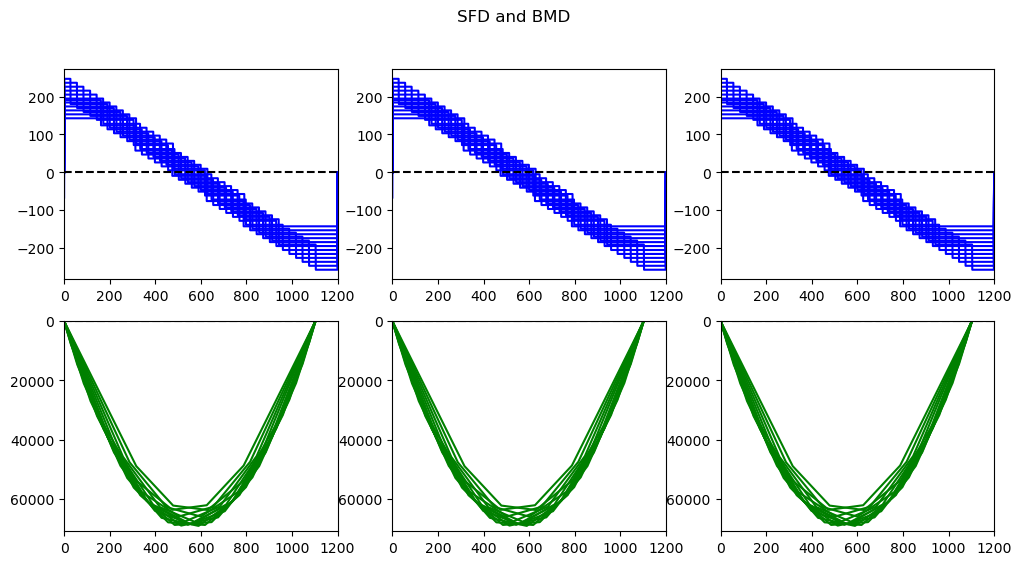

In [48]:
# plot with subplots
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(12, 6))

# check dimensions
print(len(x))
print(len(SFDi[0]))
print(len(BMDi[0]))

# add data to each axis
for col in range(n_train):
    axs[0, 0].plot(x, SFDi[col], 'b')
    axs[1, 0].plot(x, BMDi[col], 'g')
    axs[0, 1].plot(x, SFDi[col], 'b')
    axs[1, 1].plot(x, BMDi[col], 'g')
    axs[0, 2].plot(x, SFDi[col], 'b')
    axs[1, 2].plot(x, BMDi[col], 'g')
    
axs[0, 0].set_xlim([0, 1200])
axs[1, 0].set_xlim([0, 1200])
axs[0, 1].set_xlim([0, 1200])
axs[1, 1].set_xlim([0, 1200])
axs[0, 2].set_xlim([0, 1200])
axs[1, 2].set_xlim([0, 1200])

axs[1, 0].set_ylim([71000, 0])
axs[1, 1].set_ylim([71000, 0])
axs[1, 2].set_ylim([71000, 0])

# dotted lines on y=0
axs[0, 0].axhline(y = 0, color = 'black', linestyle = '--')
axs[1, 0].axhline(y = 0, color = 'black', linestyle = '--')
axs[0, 1].axhline(y = 0, color = 'black', linestyle = '--')
axs[1, 1].axhline(y = 0, color = 'black', linestyle = '--')
axs[0, 2].axhline(y = 0, color = 'black', linestyle = '--')
axs[1, 2].axhline(y = 0, color = 'black', linestyle = '--')
        
fig.suptitle('SFD and BMD')
fig.savefig("sfbm_envelopes")
print()
print(max(maxS), max(maxB))

***Look at slides Avery posted for some code, can also use chatGPT for base code***

## 2: Define Bridge Parameters, 3: Calculate Sectional Properties
Because I don't want to do user input (at least for now), be prepared to edit this part in the future.
These parameters shamelessly taken from the other code I created to calculate I.

You can also try putting these into an optimize function to optimize, alternatively, use your brain and optimize yourself.

In [49]:
# Bridge Parameters pt.1 - Design 0
t = 1.27 # can only be multiples of 1.27
tw = 100 # top flange width
bw = 80 # bottom flange width
wh = 72.46 # web height
gt = 5 # glue tab

# Surface Area - Design 0 
# DO THIS LATER
print("Maximum Surface Area:", 813*1016, "mm\u00B2")
# Assuming length of bridge is 1270 mm
l = 1270
#SA = l*tw + 


# Centroid - Design 0
num = ((wh + 2*t) + t/2)*tw*t + 2*((wh + 2*t) -t/2)*(gt + t)*t + 2*((wh + 2*t)/2)*t*wh + (t/2)*bw*t
denom = tw*t + 2*(gt + t)*t + 2*t*wh + bw*t
cy = num/denom
print("Centroid (\u0233):", cy, "mm")

'''
minim --> "lowest" point of the cross-section,
          value is relative to the centroid.
maxim --> "highest" point of the cross-section,
          value is relative to the centroid.
b --> list of different widths in order from
      top to bottom.
bn --> list of values relative to the centroid
       where width changes
n --> number of layers to sum over

n_cs
In the bridge there may be multilple cross 
sections, so at that point just make multiple 
arrays and I will add in this var so that is the 
only thing you need to manually go in and change.
In theory. Not sure if this will be used as
intended because we are probably using 2 cross
sections at maximum
'''

# Bridge Parameters pt.2 - Design 0
minim = -cy
maxim = 76.27-cy
b = [100, 2*6.27, 2*1.27, 80]
bn = [75-cy, 75-1.27-cy, -cy+1.27]
n = 1000000

# I - Design 0
def I(minim, maxim, b, bn, n):

    # result (I)
    res = 0
    # incremental thickness of layer i
    dy = (maxim - minim)/n
    # distance between axis of rotation and centre of layer i
    yi = maxim - (dy/2)

    bn.append(minim) # so won't go out of range

    k = 0
    more = True
    for i in range(n):
        res += yi**2*b[k]*dy

        yi -= dy # y changes
        if (yi < bn[k]): # b changes
            k += 1

    return res

cI = I(minim, maxim, b, bn, n)
print("Second Moment of Area (I):", cI, "mm\u2074")

Maximum Surface Area: 826008 mm²
Centroid (ȳ): 41.431094351923186 mm
Second Moment of Area (I): 418346.1064680596 mm⁴


In [53]:
# Q for - Design 0

# Q at centroidal axes (bottom)
A = (bw * t) + 2*((cy-t)*t)
print(2*cy*1.27 + (80-2*1.27)*1.27)
num = (bw * t)*(t/2) + 2*((cy-t)*t)*((cy-t)/2)
cyb = num/A
print("Centroid of chosen area:", cyb, "mm")
d = cy-cyb
print("Area:", A, "mm\u00B2")
print("d:", d, "mm") 
Qcent = A*d
print("Qcent:", Qcent, "mm\u00B3")

# Q at glue location (top)
# tw = 100
# t = 1.27
# wh = 75-2*(1.27)
print()
A = tw*t
print("Area:", A, "mm\u00B2")
d = (t+wh+t+t) - t/2 - cy
print("d:", d, "mm")
Qglue = A*d
print("Qglue:", Qglue, "mm\u00B3")

203.6091796538849
Centroid of chosen area: 10.377312791165513 mm
Area: 203.6091796538849 mm²
d: 31.05378156075767 mm
Qcent: 6322.834988736807 mm³

Area: 127.0 mm²
d: 34.20390564807679 mm
Qglue: 4343.896017305752 mm³


## 4: Calculate Applied Stress
Only the maixmums?

In [57]:
print("Maximum stress", max(maxS))
print("Maximum moment", max(maxB))

# We still assuming only one cross-section rn - Design 0
print()
S_top = (max(maxB)*(t+wh+t+t - cy)) / cI
S_bot  = (max(maxB) * cy) / cI
print("Maximum Compressive Bending Stress:", S_top, "MPa")
print("Maximum Tensile Bending Stress:", S_bot, "MPa")

print()
T_cent = (max(maxS) * Qcent) / (cI * 2*t) # chose bottom area, base is the width at centroid?
T_glue = (max(maxS) * Qglue) / (cI * gt*2) # chose top area, base is glue tab width gt*2
print("Maximum Shear Stress - Matboard:", T_cent, "MPa")
print("Maximum Shear Stress - Glue:", T_glue, "MPa")

Maximum stress 257.3333333333333
Maximum moment 69199.45454545456

Maximum Compressive Bending Stress: 5.762772093569216 MPa
Maximum Tensile Bending Stress: 6.853199028382117 MPa

Maximum Shear Stress - Matboard: 1.5312230057406822 MPa
Maximum Shear Stress - Glue: 0.267202018736136 MPa


## 5: Material and Thin Plate Buckling Capacities

In [67]:
E = 4000 # MPa
poiss = 0.2

# Design 0
S_tens = S_bot
S_comp = S_top
T_max = T_cent
T_gmax = T_glue

import math
# 4 local buckling cases - Design 0

# 1 - restrained on both sides
#b = bw-2*t-gt
b = bw
k = 4
S_buck1 = (k*(math.pi**2)*E)/(12*(1-poiss**2))*(t/b)**2
print("b:", b, "t:", t) # b: 72.46, t: 1.27
print("LB Case 1:", S_buck1, "MPa") # this one is a bit concerning

# 2 - restrained on one side
print()
#b = (tw-bw)/2 + t + gt/2
b = 10
print("b:", b, "t:", t) # b: 13.77, t: 1.27
k = 0.425
S_buck2 = (k*(math.pi**2)*E)/(12*(1-poiss**2)) * (t/b)**2
print("LB Case 2:", S_buck2, "MPa")

# 3 - variable stress
print()
tn = (wh+2*t)-cy # tn: 33.56...
k = 6
S_buck3 = (k*(math.pi**2)*E)/(12*(1-poiss**2)) * (t/tn)**2 # questionable af
print("tn:", tn, "t:", t)
print("LB Case 3:", S_buck3, "MPa")

# 4 - shear  buckling
print()
k = 5
a = 400 # no a this time but change when it starts showing up
print("wh:", wh) # wh: 72.46, diagphram height
T_buck = (k*(math.pi**2)*E)/(12*(1-poiss**2)) * ((t/wh)**2 + (t/a)**2)
print("LB Case 4:", T_buck, "MPa")

b: 80 t: 1.27
LB Case 1: 3.454575724504563 MPa

b: 10 t: 1.27
LB Case 2: 23.491114926631024 MPa

tn: 33.568905648076814 t: 1.27
LB Case 3: 29.430089518653453 MPa

wh: 72.46
LB Case 4: 5.436391400701383 MPa


## 6: FOS
Come back and fix these and previous calculations because they are questionable

In [69]:
# YOU ARE CALCULATING THESE WRONG
FOS_tens = 30 / S_bot
FOS_comp = 6 / S_top
FOS_shear = 4 / T_cent
FOS_glue = 2 / T_glue

'''
FOS_buck1 = S_buck1 / (max(maxB)*(wh+3*t-t/2-cy)/cI)
FOS_buck2 = S_buck2 / (max(maxB)*(wh+3*t-t/2-cy)/cI)
FOS_buck3 = S_buck3 / (max(maxB)*((wh+2*t-cy)/2)/cI)
'''
FOS_buck1 = S_buck1 / S_top
FOS_buck2 = S_buck2 / S_top
FOS_buck3 = S_buck3 / S_top #(max(maxB)*(wh+2*t-cy)/cI)
FOS_buckV = T_buck / T_cent

print()
print("FOS_tens:", FOS_tens)
print("FOS_comp", FOS_comp)
print()
print("FOS_shear", FOS_shear)
print("FOS_glue", FOS_glue)
print()
print("FOS_buck1", FOS_buck1)
print("FOS_buck2", FOS_buck2)
print("FOS_buck3", FOS_buck3)
print("FOS_buckV", FOS_buckV)


FOS_tens: 4.377517692942636
FOS_comp 1.0411655888136737

FOS_shear 2.6122909497856734
FOS_glue 7.484973390021484

FOS_buck1 0.5994642280508694
FOS_buck2 4.076356750745911
FOS_buck3 5.106932747087991
FOS_buckV 3.5503590138862204


## 7: Min FOS and the failure load Pfail

## 8: Vfail and Mfail

## 9: Output plots of Vfail and Mfail

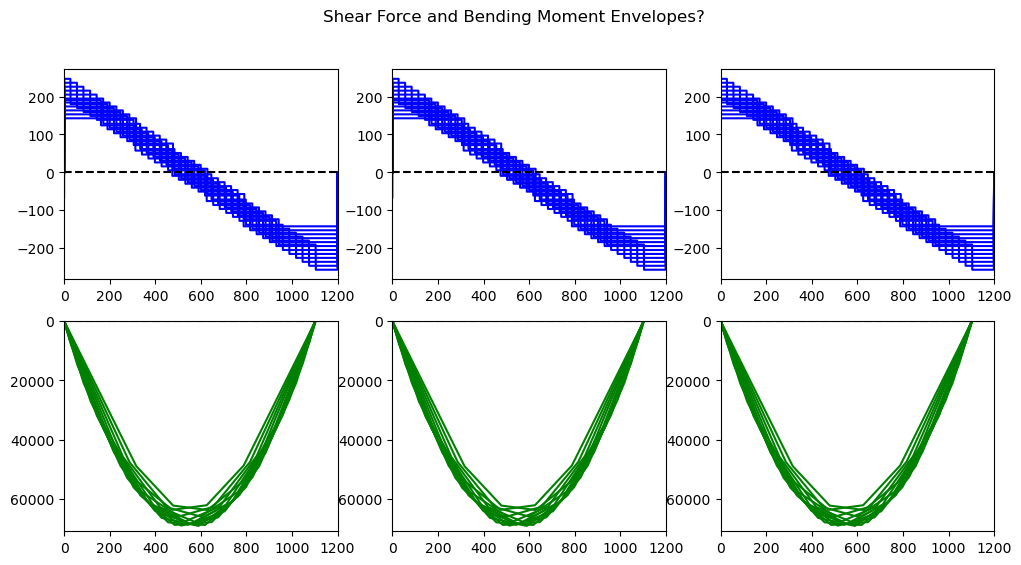

In [47]:
fig
